In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

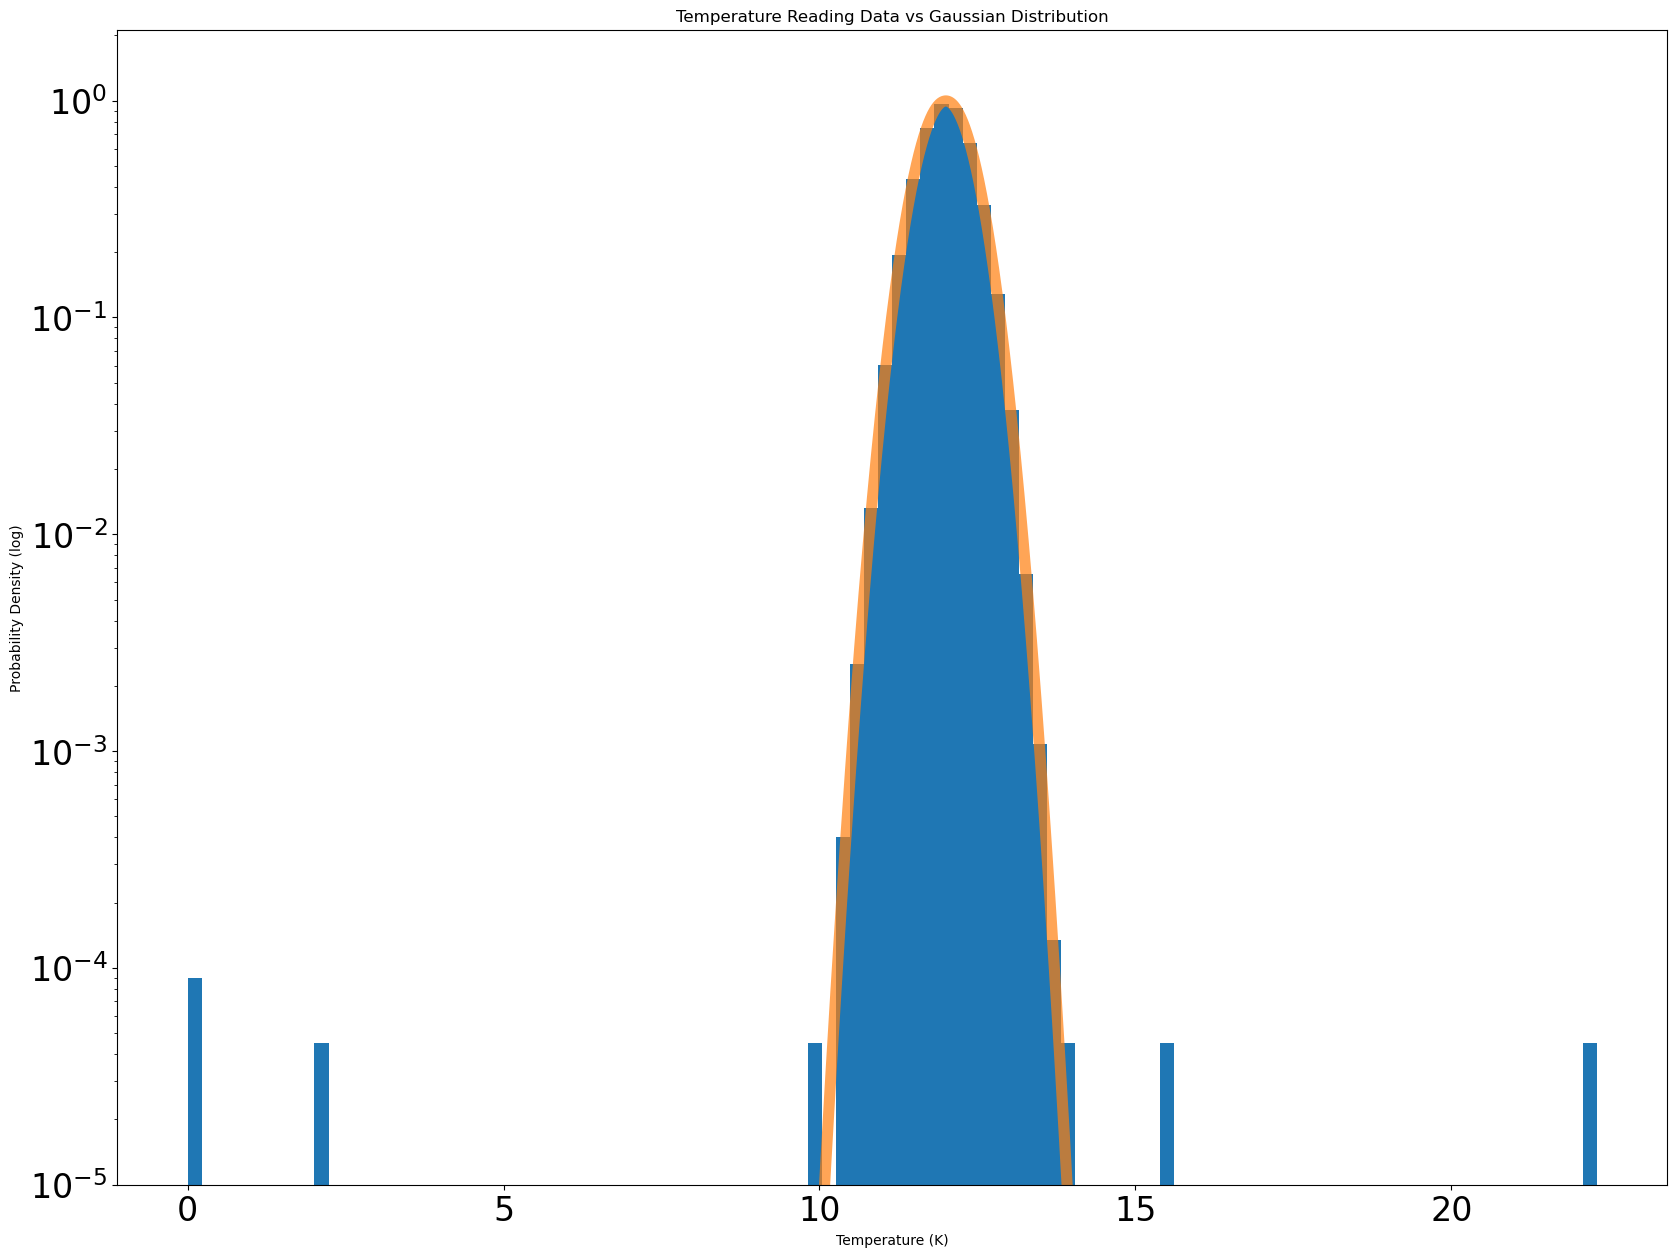

In [54]:
# Problem 1.A.1

d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.linspace(9.8,14.2,1000)
ax.plot(x,stats.norm.pdf(x,loc = 12, scale = 0.4),linewidth = 8,alpha = 0.7)
plt.ylim(0.00001)
plt.xlabel('Temperature (K)')
plt.ylabel('Probability Density (log)')
plt.title('Temperature Reading Data vs Gaussian Distribution')
plt.show()

The above plot shows the created data with a Gaussian curve plotted over it on a semilog scale. It can be seen that the data points that are not outliers fit well within the Gaussian curve, while all outliers are significantly outside of it.

In [ ]:
prob = stats.norm.sf(5, loc = 0, scale = 1)
measureA = stats.norm.isf(prob3, loc = 12, scale = 0.4) # Above the mean
measureB = stats.norm.ppf(prob3, loc = 12, scale = 0.4) # Below the mean

print("Those measuremnts that lie above", measureA, "and below", measureB, "Will be discarded for being bad data")

Problem 1.A.2

What is the probability that my data is less signal like than 10? What is the probability that my data is more signal like than 14?

I have chosen this statistical question because the plot shows that the most of the outilier data points are clearly outside of the gaussian distribution, and those first outlying values are either below 10 K or above 14 K. These values are would also be more than 5 sigma away from the mean, insuring that they are rare events.

Problem 1.A.3

For the first threshold, Integrate a Gaussian distribution with a mean of 12, and standard deviation of 0.4 from negative infinity to 10. For the second threshold, integrate a Gaussian distribution, with the same parameters as above from 15 to infinity.

Problem 1.A.4

||True Good T|True Bad T|
|----|----|----|
|My test good|100,000|1|
|My test bad|0|7|

Problem 1.B

The statistical threshold that I chose throws out none of the good data in this case. However it could be possible for extremely rare events to occur beyond the threshold that I am using to exclude data, and still be under the curve of a Gaussian distribution. These value could be predicted by integrating the probability distribution from infinity or negative infinity to the respective boundary values, and multiplying that by the total number of good data points. 

Problem 1.C

There are mistakes of commission. These mistakes are unavoidable, as any data that lies within the Gaussian curve is considered to be good data, which is the only metric that can be used to determine if the data is good data. These mistakes depend on the fact that I am only cutting off the group of events that lie close to the mean of the distribution, so any points that are inside of the distribution (near the mean) are considered good data points.

Problem 2.1

What is the distance in arcseconds that an asteroid would need to travel, in order to have a significance of 5 sigma, or a probability of 1 in 3.5 million?

Problem 2.2

The total distance that the asteroid travels is the magnitude of the vector made up by the Gaussian distribtution for the X and Y components of motion. The magnitude of a vector is $\sqrt{X_{i}^2 + Y_{j}^2}$. Both distributions have a mean of 0, and a standard deviation of 1. Analytically it can be shown, that the operation shown above perfomed on two guassian distributions with the parameters of these ones forms a Rayleigh distribution.

To get this answer using math, you would integrate a Rayleigh distribution with a variance of 1, from infinity, until 1 - the probability found integrating is equal to the probability of a 5 sigma event which is 1 in 3.5 million.

In [87]:
# Problem 2.3

prob5_sigma = 1 - stats.norm.cdf(5)

asteroid_dist = stats.rayleigh.isf(prob5_sigma, scale=1, loc=0)
print ('Asteroid distance traveled to insure 5 sigma discovery: ', asteroid_dist)

Asteroid distance traveled to insure 5 sigma discovery:  5.489079776034238


Problem 3.1

What is the significance of our observation if we observe 6800 cosmic rays from a moon sized patch in the sky, that is observeable for 8 hours a night over a period of 15 days?

Problem 3.2

The background distribution will be a poisson distribution, as the data is random events occuring over a period of time. The distribution would then need to be convolved 7200 times, as the average rate parameter for the distribution occurs over 1 minute. To get the distribution for the total number of occurrences observed, we would need to sum each minute increment for all of the time we were observing. This ends up being 60 * 8 * 15 which is 7200. A poisson distribution convolved with another poisson distribution, is still a poisson that has a new mean of the sums of the two means of the distributions being convolved. Because the mean of the original distribution is 1, the distribution representing all of the data would be a poisson distribution of 7200.

Because the observed number of events is below the mean, we would first calculate the probability of 6800 events occurring, by integrating the distribution from the start of the distribution to 6800. To then calculate the significance, we would integrate over a standard normal distribution from negative infinity until we reach the probability calculated above, and report the value on the x axis at which that occurs.

In [85]:
# Problem 3.3

convolved_mean = 60 * 8 * 15

prob_6800 = stats.poisson.cdf(6800, mu=7200)

sigma = abs(stats.norm.ppf(prob_6800))
print("Significance ", sigma)

Significance  4.750747965777188
